
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime



In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [6]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [7]:

tsDataWrangling_obj.for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.000000,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,-0.044380,0.000000,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.009040,0.000000,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.101686,0.000000,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.109500,0.004444,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,-0.116500,0.008900,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.008667,-0.037618,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,-0.063000,-0.014340,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0



## Training Functions


In [8]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': []}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( 0 ) # loss_A.item()  )
        history['loss_B'].append( 0 ) # loss_B.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [9]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.3395097255706787
seq length of pred =  30
500 train loss =  0.04956453666090965
seq length of pred =  30
1000 train loss =  0.019307013601064682
seq length of pred =  30
1500 train loss =  0.011073339730501175
seq length of pred =  30
2000 train loss =  0.00682650413364172
seq length of pred =  30
2500 train loss =  0.004818045999854803
seq length of pred =  30


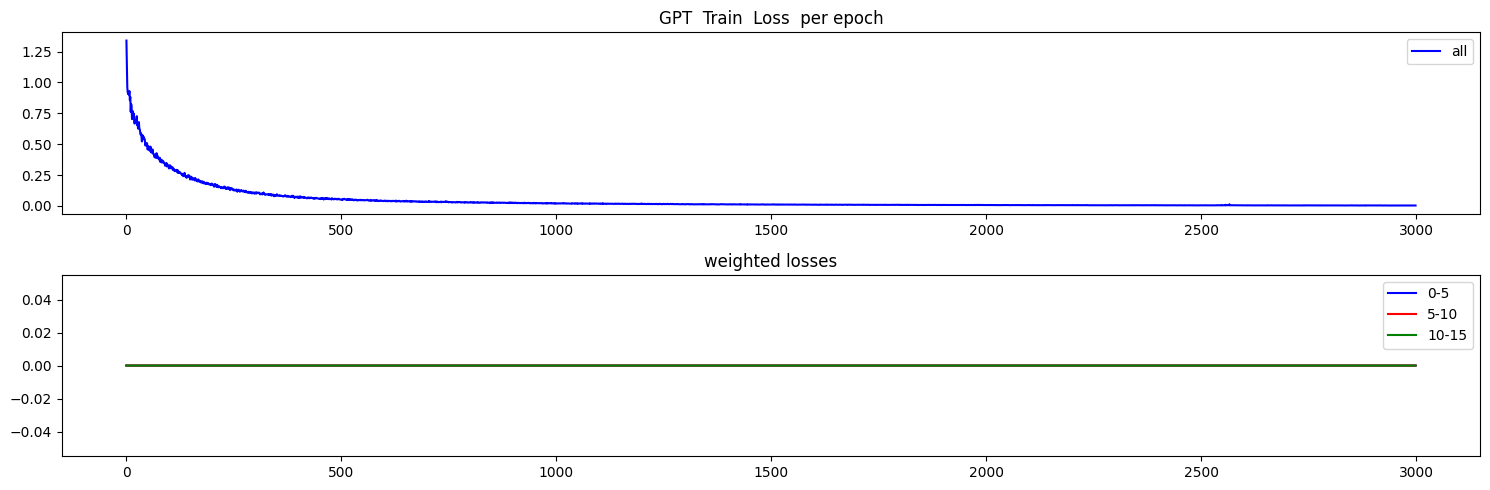

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.24712921679019928
Test MSE Loss - SI only 0-5:  1.1336236000061035
Test MSE Loss - SI only 5-10:  0.20327329635620117
Test MSE Loss - SI only 10-15:  0.14299818873405457
mae, mse, rmse, mape, mspe, rse, corr
(0.32880688, 0.24712922, 0.49712092, 3.6147826, 67.43811, 1.5181828)
Testing R**2 - SI only:  -1.3048788237600983
Testing R**2 - SI only:  -1.3048788237600983
Testing R**2 - All features:  0.9222393539492704


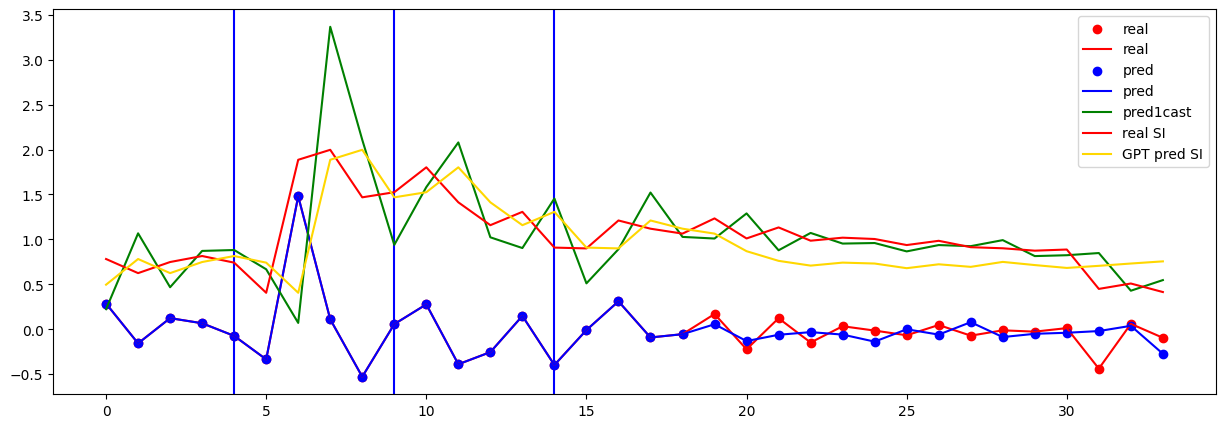

In [10]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0806430578231812
seq length of pred =  30
500 train loss =  0.08432435989379883
seq length of pred =  30
1000 train loss =  0.03888564556837082
seq length of pred =  30
1500 train loss =  0.018574204295873642
seq length of pred =  30
2000 train loss =  0.013851367868483067
seq length of pred =  30
2500 train loss =  0.008084041066467762
seq length of pred =  30


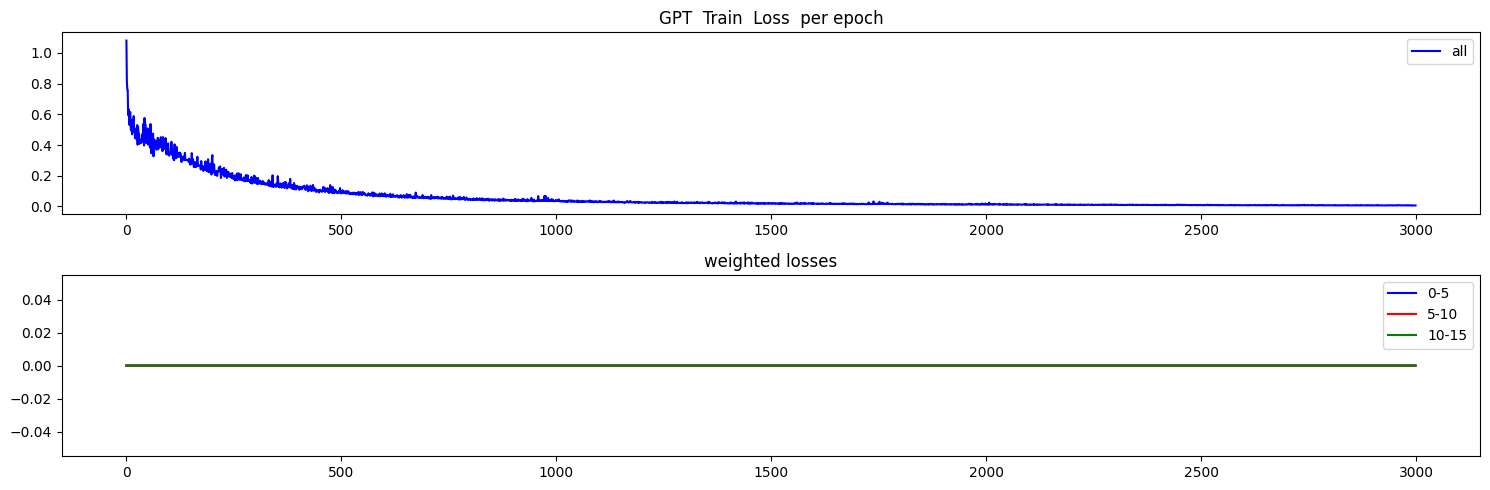

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.24975360929965973
Test MSE Loss - SI only 0-5:  1.1336236000061035
Test MSE Loss - SI only 5-10:  0.20327329635620117
Test MSE Loss - SI only 10-15:  0.14299817383289337
mae, mse, rmse, mape, mspe, rse, corr
(0.33218864, 0.2497536, 0.49975353, 3.6429043, 67.52852, 1.5262225)
Testing R**2 - SI only:  -1.329355194002865
Testing R**2 - SI only:  -1.329355194002865
Testing R**2 - All features:  0.9244938403169177


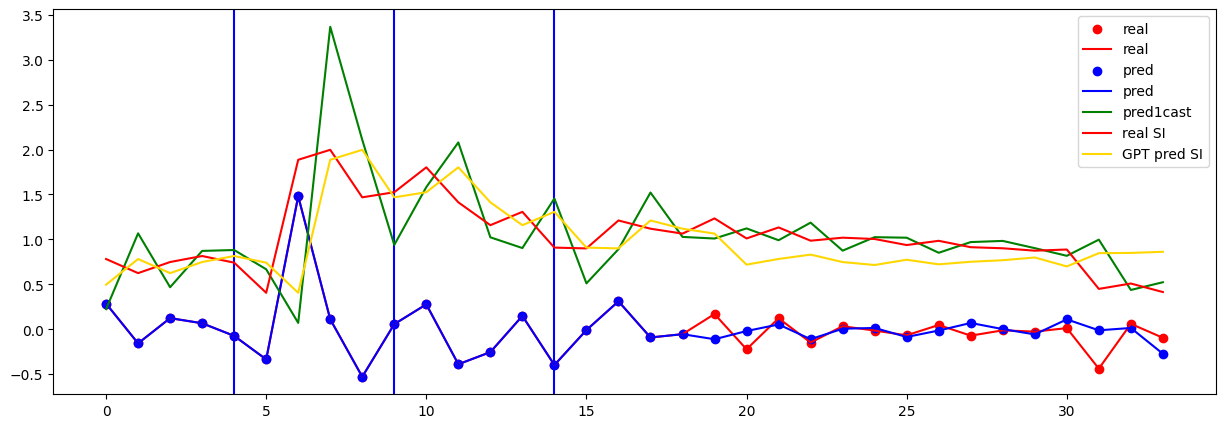

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.351669430732727
seq length of pred =  30
500 train loss =  0.1587158739566803
seq length of pred =  30
1000 train loss =  0.06122393161058426
seq length of pred =  30
1500 train loss =  0.035573702305555344
seq length of pred =  30
2000 train loss =  0.020960360765457153
seq length of pred =  30
2500 train loss =  0.01583307608962059
seq length of pred =  30


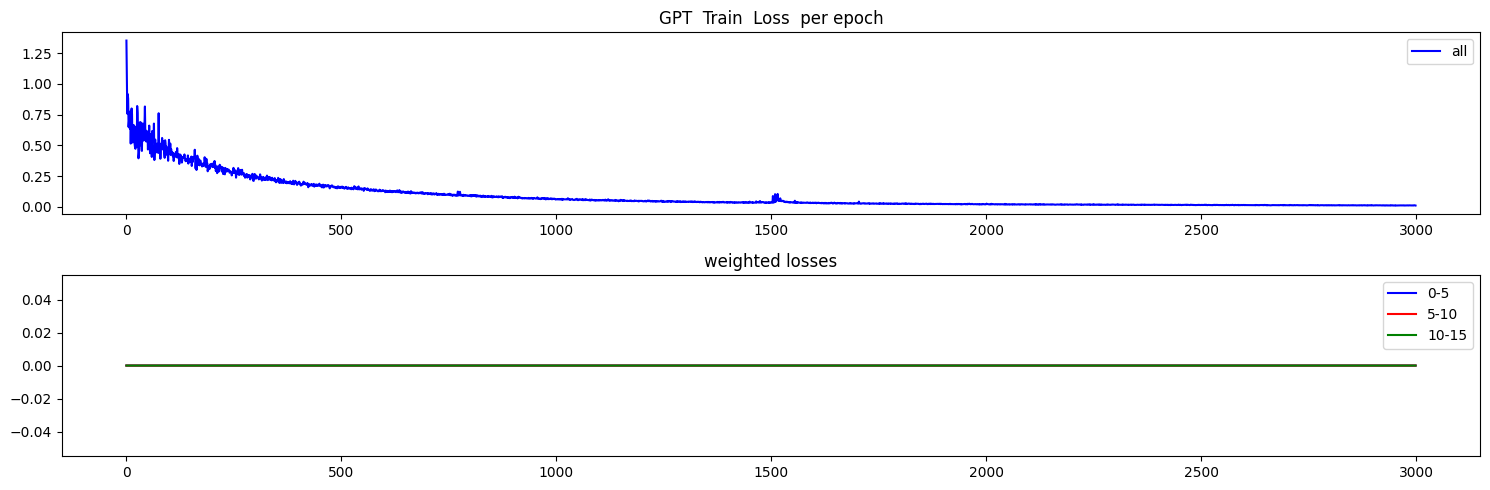

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.24162982404232025
Test MSE Loss - SI only 0-5:  1.1336236000061035
Test MSE Loss - SI only 5-10:  0.20327329635620117
Test MSE Loss - SI only 10-15:  0.14299818873405457
mae, mse, rmse, mape, mspe, rse, corr
(0.31531185, 0.24162985, 0.4915586, 3.5569744, 67.56675, 1.5011957)
Testing R**2 - SI only:  -1.2535881826121664
Testing R**2 - SI only:  -1.2535881826121664
Testing R**2 - All features:  0.9244771154007239


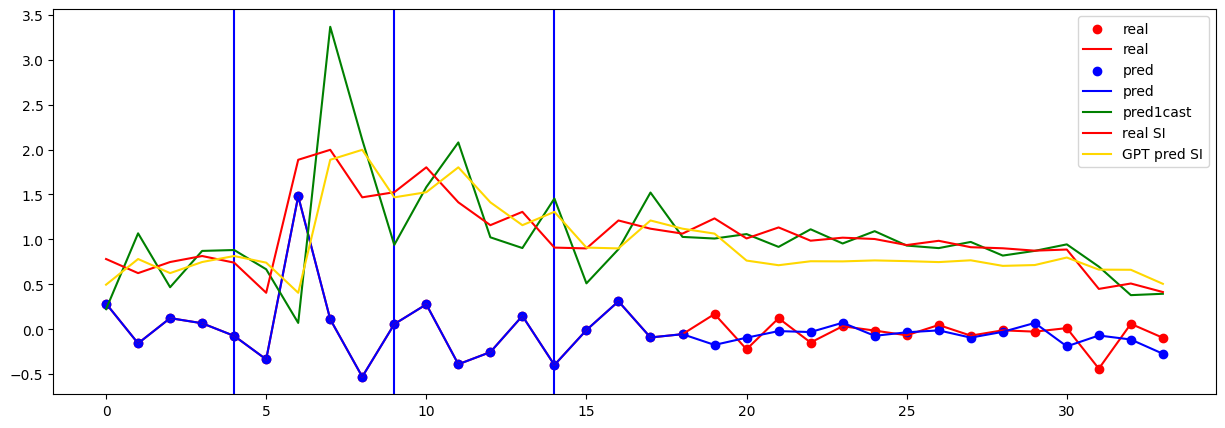

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0957494974136353
seq length of pred =  30
500 train loss =  0.1823405623435974
seq length of pred =  30
1000 train loss =  0.08693376928567886
seq length of pred =  30
1500 train loss =  0.05246591195464134
seq length of pred =  30
2000 train loss =  0.03085019253194332
seq length of pred =  30
2500 train loss =  0.023332402110099792
seq length of pred =  30


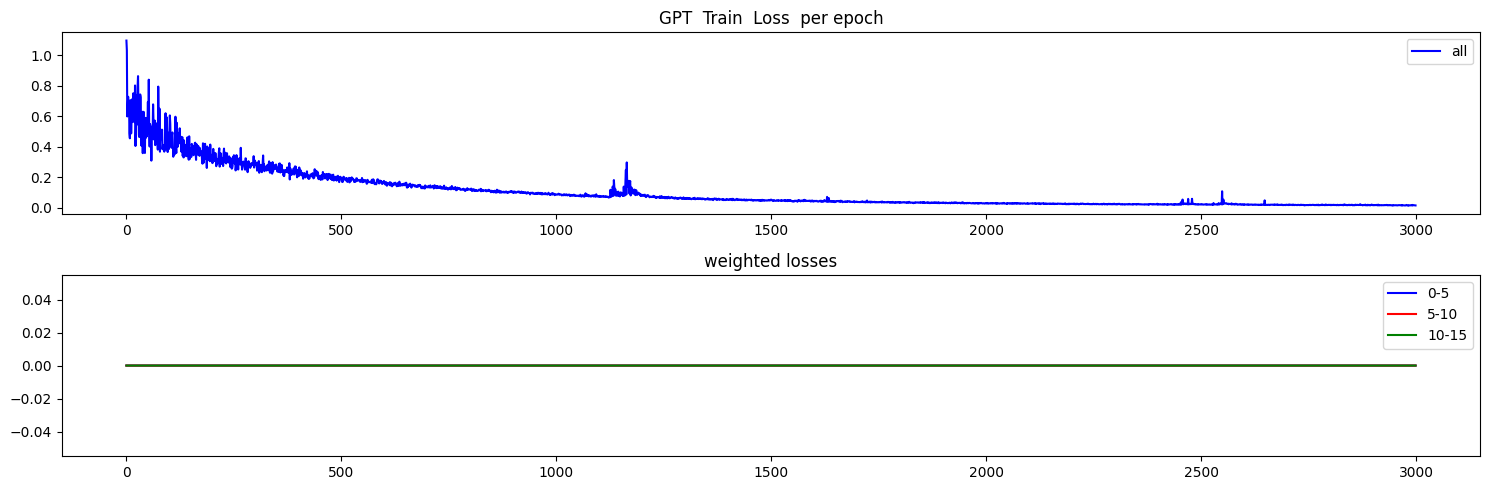

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.24941028654575348
Test MSE Loss - SI only 0-5:  1.1336236000061035
Test MSE Loss - SI only 5-10:  0.20327329635620117
Test MSE Loss - SI only 10-15:  0.14299817383289337
mae, mse, rmse, mape, mspe, rse, corr
(0.32851636, 0.24941032, 0.49940997, 3.5946934, 67.35314, 1.5251733)
Testing R**2 - SI only:  -1.3261534486411999
Testing R**2 - SI only:  -1.3261534486411999
Testing R**2 - All features:  0.9252282115428794


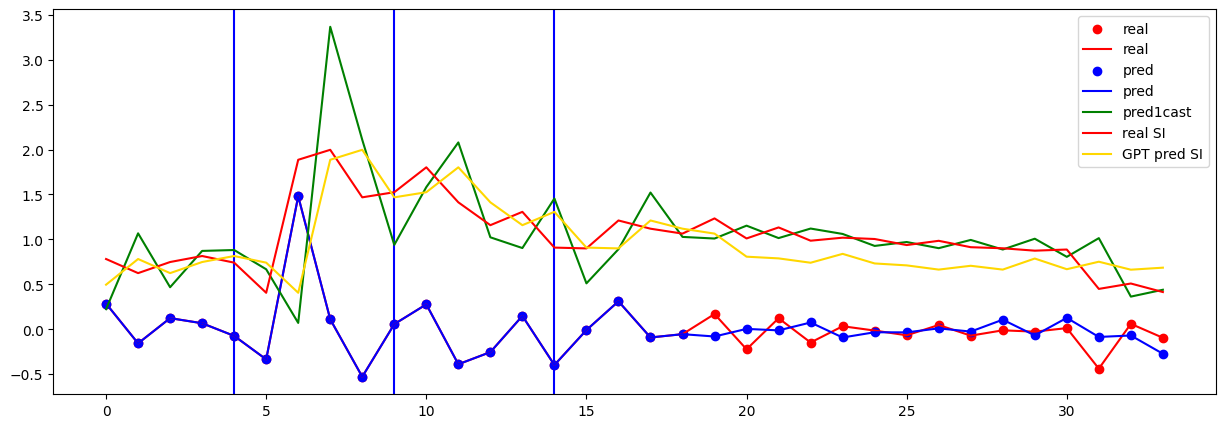

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  1.4684691429138184
seq length of pred =  30
500 train loss =  0.05289393663406372
seq length of pred =  30
1000 train loss =  0.02184823527932167
seq length of pred =  30
1500 train loss =  0.011447365395724773
seq length of pred =  30
2000 train loss =  0.007041935808956623
seq length of pred =  30
2500 train loss =  0.004799002781510353
seq length of pred =  30


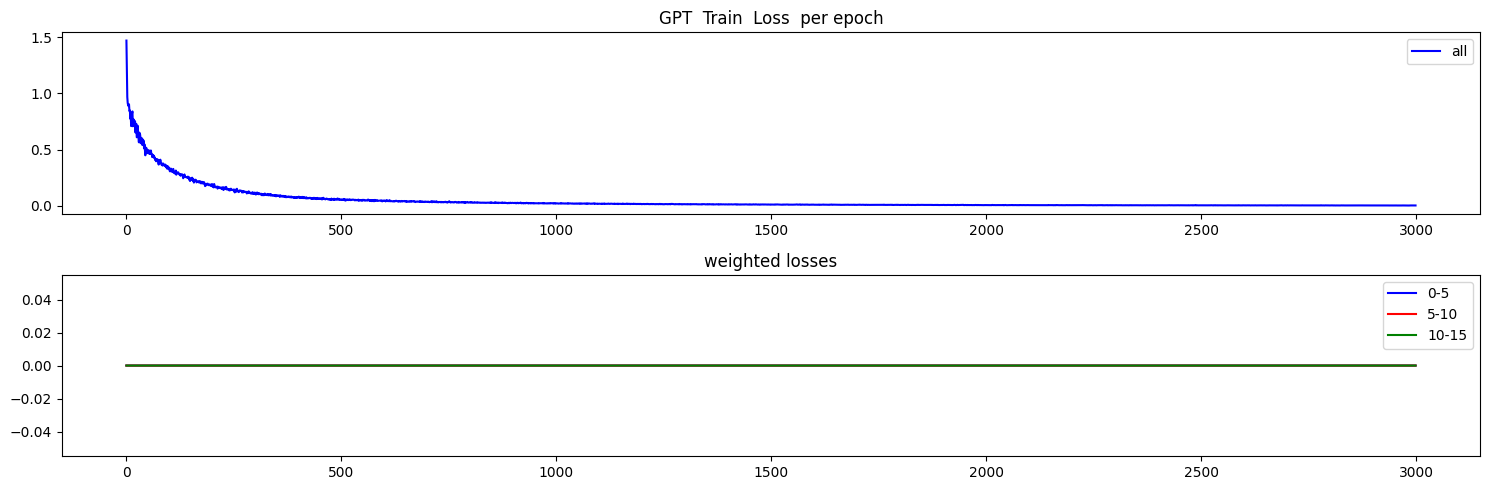

max tokens  84
torch.Size([1, 20, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.06101028621196747
Test MSE Loss - SI only 0-5:  0.04206138104200363
Test MSE Loss - SI only 5-10:  0.07633031159639359
Test MSE Loss - SI only 10-15:  0.05545998364686966
mae, mse, rmse, mape, mspe, rse, corr
(0.18254746, 0.061010286, 0.2470026, 7.8374395, 1470.4557, 1.3288922)
Testing R**2 - SI only:  -0.7659548620512591
Testing R**2 - SI only:  -0.7659548620512591
Testing R**2 - All features:  0.9549128596808798


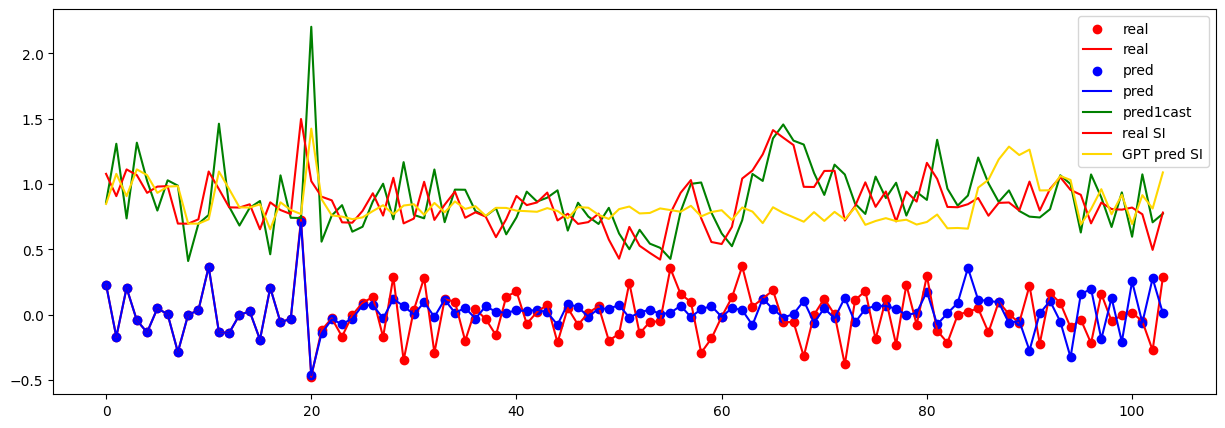

In [14]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 84 )  ## 99



## 015 to 030


0 train loss =  1.1958683729171753
seq length of pred =  30
500 train loss =  0.045355286449193954
seq length of pred =  30
1000 train loss =  0.017289886251091957
seq length of pred =  30
1500 train loss =  0.01120749581605196
seq length of pred =  30
2000 train loss =  0.006237738765776157
seq length of pred =  30
2500 train loss =  0.004029321484267712
seq length of pred =  30


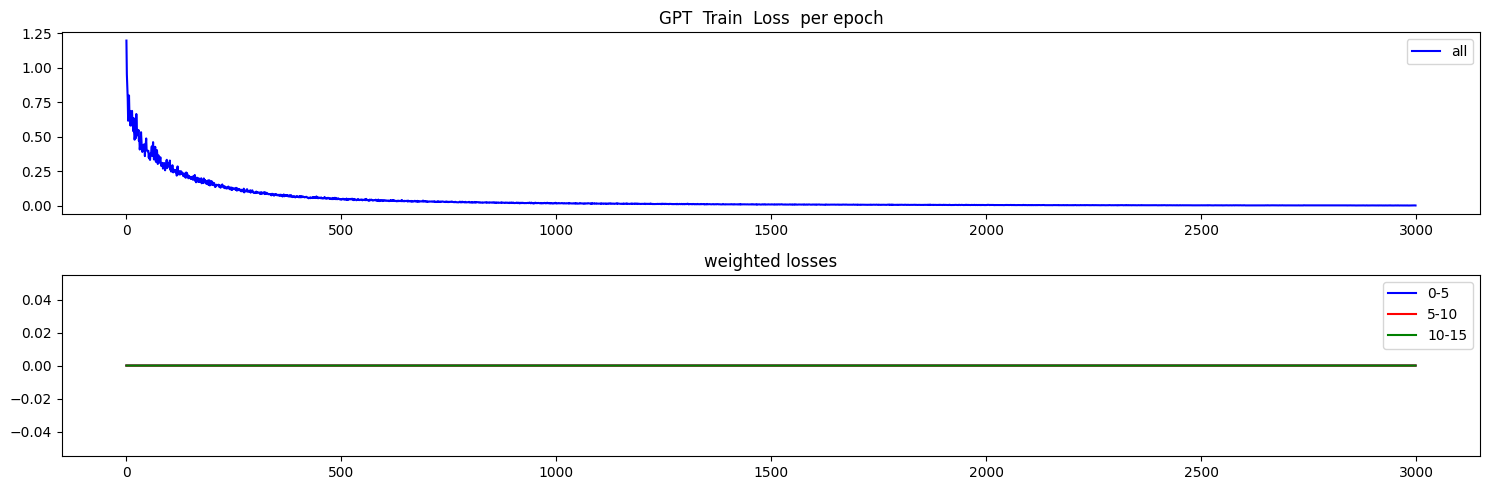

max tokens  84
torch.Size([1, 20, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.10183428227901459
Test MSE Loss - SI only 0-5:  0.4357689917087555
Test MSE Loss - SI only 5-10:  0.06865420937538147
Test MSE Loss - SI only 10-15:  0.22242562472820282
mae, mse, rmse, mape, mspe, rse, corr
(0.22967611, 0.10183427, 0.3191148, 3.9099767, 112.82666, 1.295279)
Testing R**2 - SI only:  -0.6777478968476693
Testing R**2 - SI only:  -0.6777478968476693
Testing R**2 - All features:  0.8564213762613395


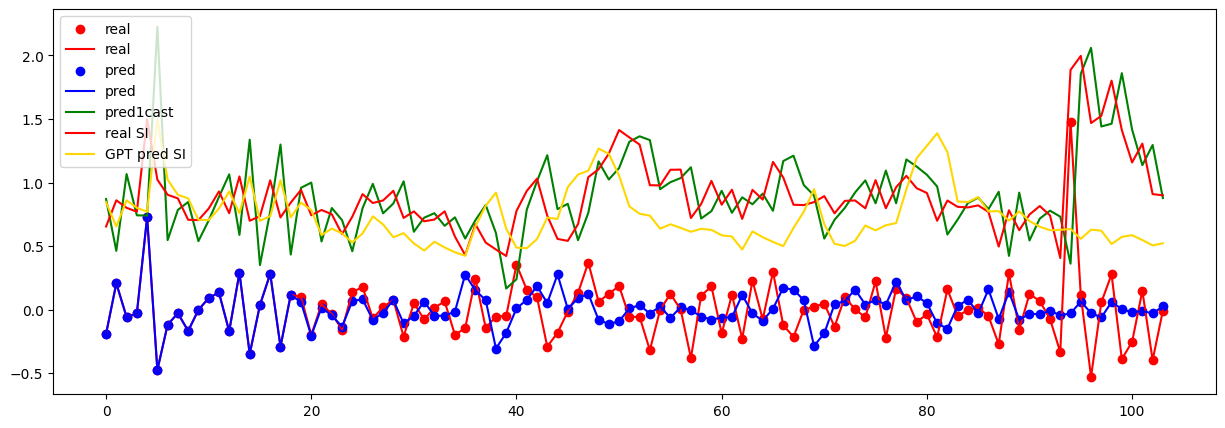

In [16]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 84 )



## 030 to 045


0 train loss =  1.4577528238296509
seq length of pred =  30
500 train loss =  0.05484209209680557
seq length of pred =  30
1000 train loss =  0.020040614530444145
seq length of pred =  30
1500 train loss =  0.010823019780218601
seq length of pred =  30
2000 train loss =  0.0068203965201973915
seq length of pred =  30
2500 train loss =  0.004112451337277889
seq length of pred =  30


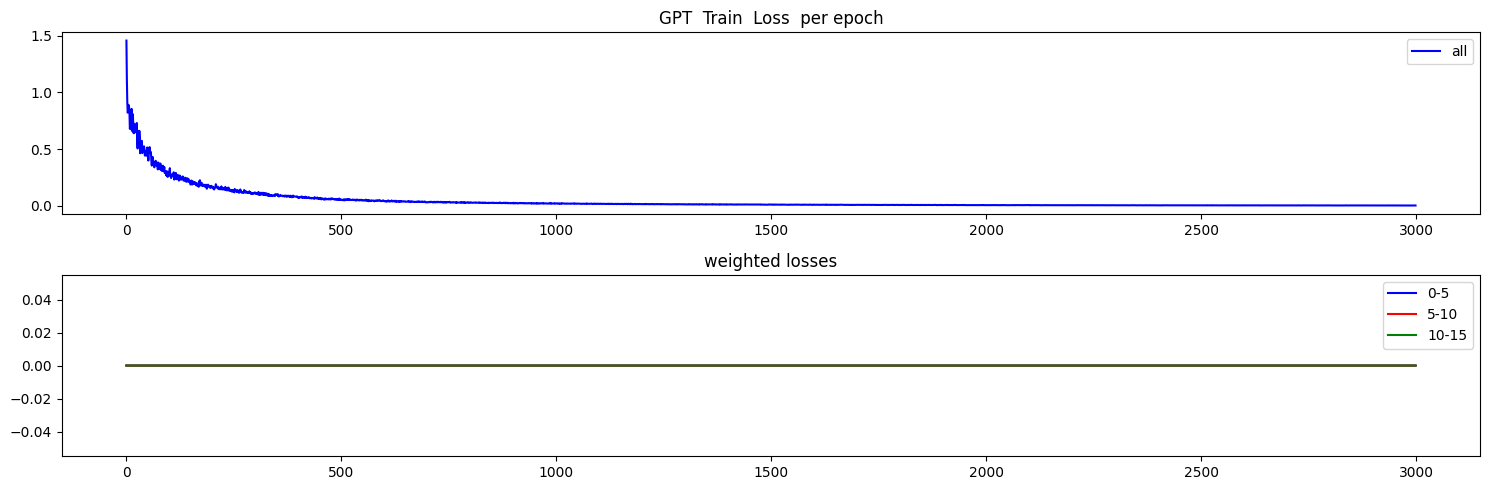

max tokens  84
torch.Size([1, 20, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.06403035670518875
Test MSE Loss - SI only 0-5:  0.0340297557413578
Test MSE Loss - SI only 5-10:  0.03222682327032089
Test MSE Loss - SI only 10-15:  0.036190666258335114
mae, mse, rmse, mape, mspe, rse, corr
(0.17955229, 0.06403036, 0.2530422, 3.408084, 106.95341, 1.1099149)
Testing R**2 - SI only:  -0.2319111186306
Testing R**2 - SI only:  -0.2319111186306
Testing R**2 - All features:  0.8473796823853181


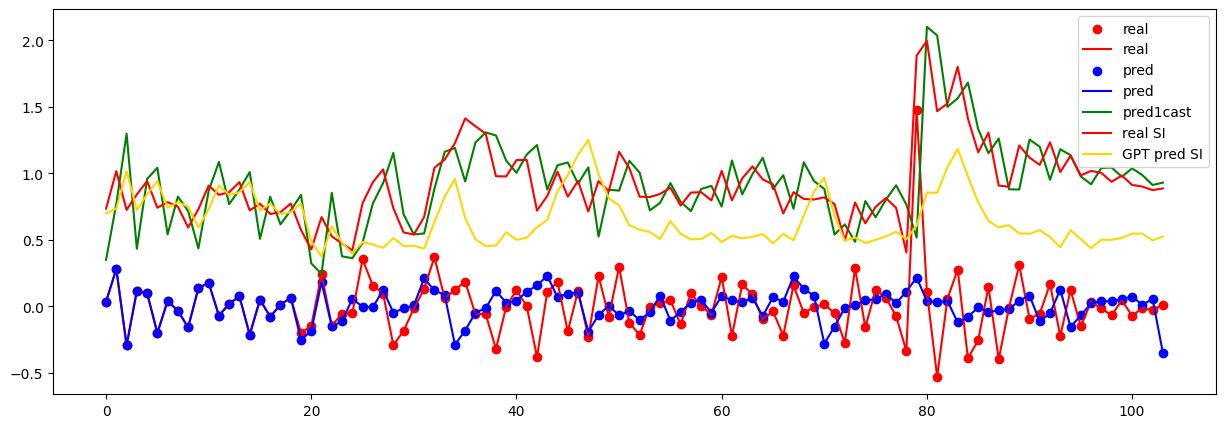

In [17]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 84 )  ## 99



## 045 to 060


0 train loss =  1.2831370830535889
seq length of pred =  30
500 train loss =  0.04508644714951515
seq length of pred =  30
1000 train loss =  0.019463788717985153
seq length of pred =  30
1500 train loss =  0.01094620767980814
seq length of pred =  30
2000 train loss =  0.00634364178404212
seq length of pred =  30
2500 train loss =  0.0050026243552565575
seq length of pred =  30


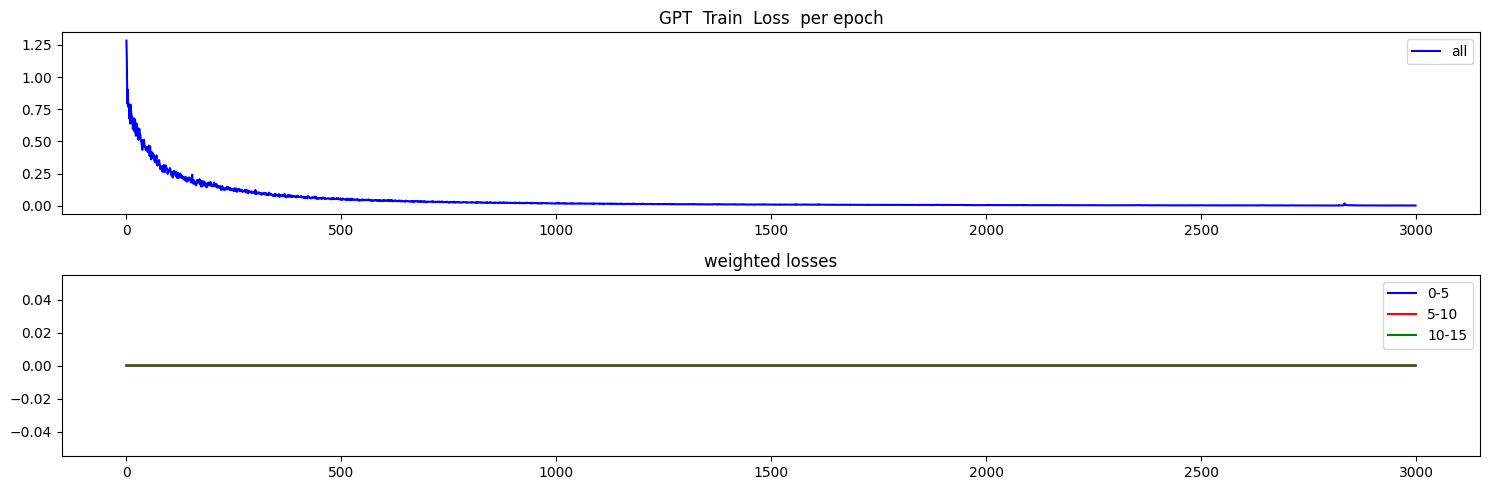

max tokens  84
torch.Size([1, 20, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.09615785628557205
Test MSE Loss - SI only 0-5:  0.07638398557901382
Test MSE Loss - SI only 5-10:  0.07152655720710754
Test MSE Loss - SI only 10-15:  0.042657870799303055
mae, mse, rmse, mape, mspe, rse, corr
(0.22140649, 0.09615786, 0.3100933, 5.5059824, 272.02643, 1.2731068)
Testing R**2 - SI only:  -0.6208012150603794
Testing R**2 - SI only:  -0.6208012150603794
Testing R**2 - All features:  0.7202520173668845


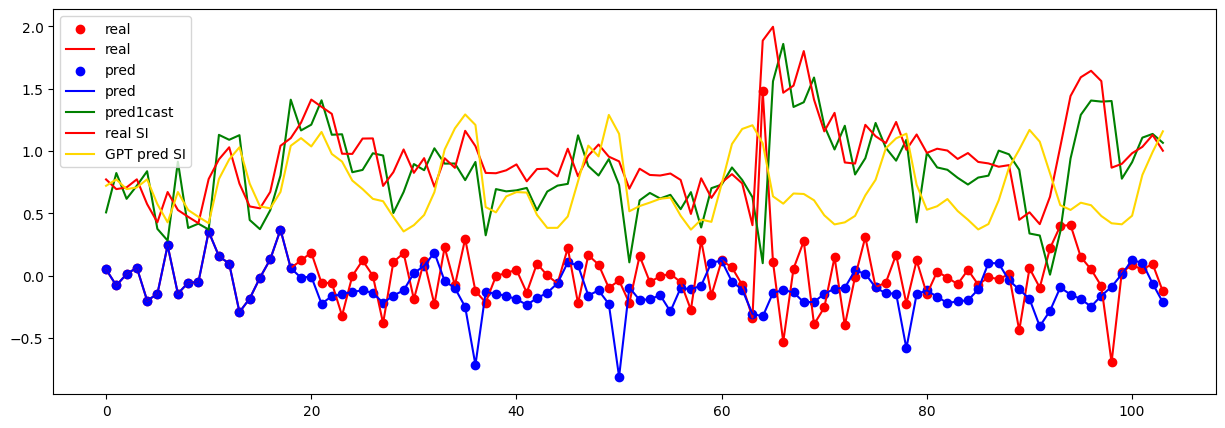

In [18]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 84 )



## 060 to 075


0 train loss =  1.2223988771438599
seq length of pred =  30
500 train loss =  0.05399247258901596
seq length of pred =  30
1000 train loss =  0.01923796348273754
seq length of pred =  30
1500 train loss =  0.01141082588583231
seq length of pred =  30
2000 train loss =  0.006539537571370602
seq length of pred =  30
2500 train loss =  0.004445686005055904
seq length of pred =  30


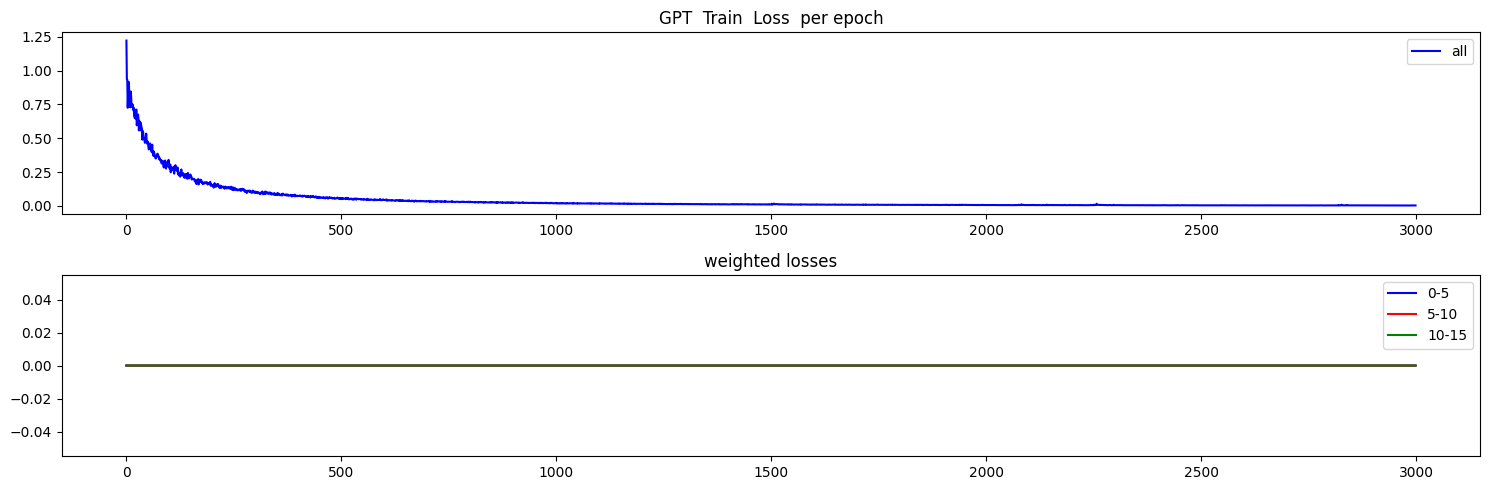

max tokens  84
torch.Size([1, 20, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.07537686824798584
Test MSE Loss - SI only 0-5:  0.027284791693091393
Test MSE Loss - SI only 5-10:  0.10380108654499054
Test MSE Loss - SI only 10-15:  0.11293947696685791
mae, mse, rmse, mape, mspe, rse, corr
(0.19538054, 0.07537687, 0.27454847, 6.586649, 664.7192, 1.1391193)
Testing R**2 - SI only:  -0.2975925079462025
Testing R**2 - SI only:  -0.2975925079462025
Testing R**2 - All features:  0.8443359361866922


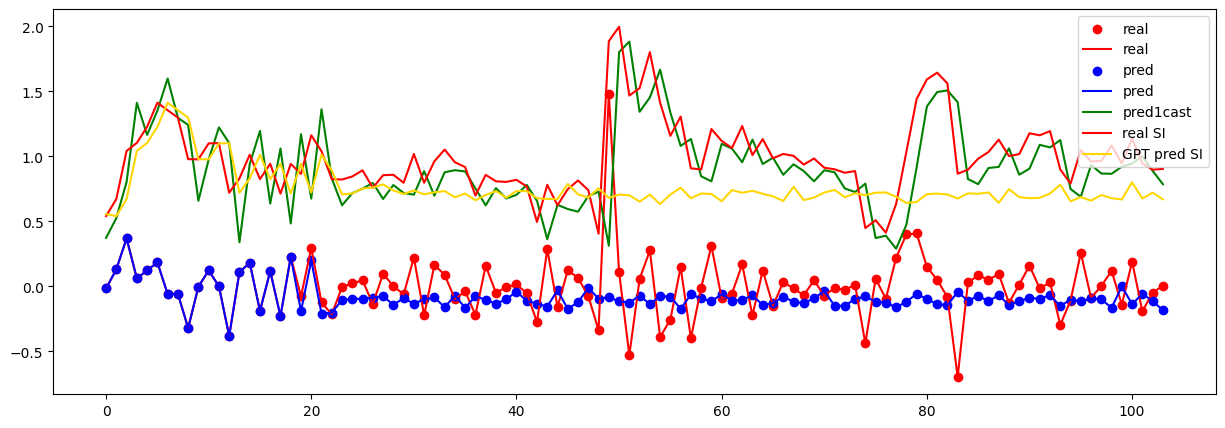

In [19]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 84 )



## 075 to 090


0 train loss =  1.2337546348571777
seq length of pred =  30
500 train loss =  0.053744103759527206
seq length of pred =  30
1000 train loss =  0.021260838955640793
seq length of pred =  30
1500 train loss =  0.010501719079911709
seq length of pred =  30
2000 train loss =  0.006611569318920374
seq length of pred =  30
2500 train loss =  0.004175283946096897
seq length of pred =  30


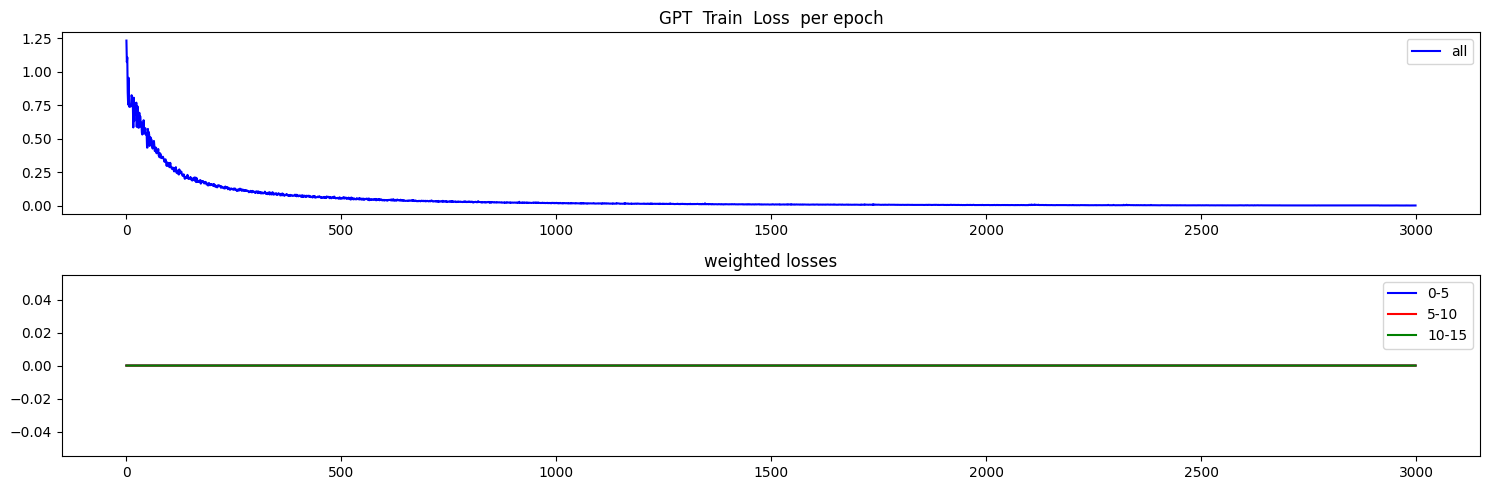

max tokens  84
torch.Size([1, 20, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.0905863419175148
Test MSE Loss - SI only 0-5:  0.09235256165266037
Test MSE Loss - SI only 5-10:  0.01964373141527176
Test MSE Loss - SI only 10-15:  0.08715896308422089
mae, mse, rmse, mape, mspe, rse, corr
(0.22739625, 0.09058635, 0.30097565, 10.379818, 3861.3354, 1.2635983)
Testing R**2 - SI only:  -0.5966805756134828
Testing R**2 - SI only:  -0.5966805756134828
Testing R**2 - All features:  0.8581126518874377


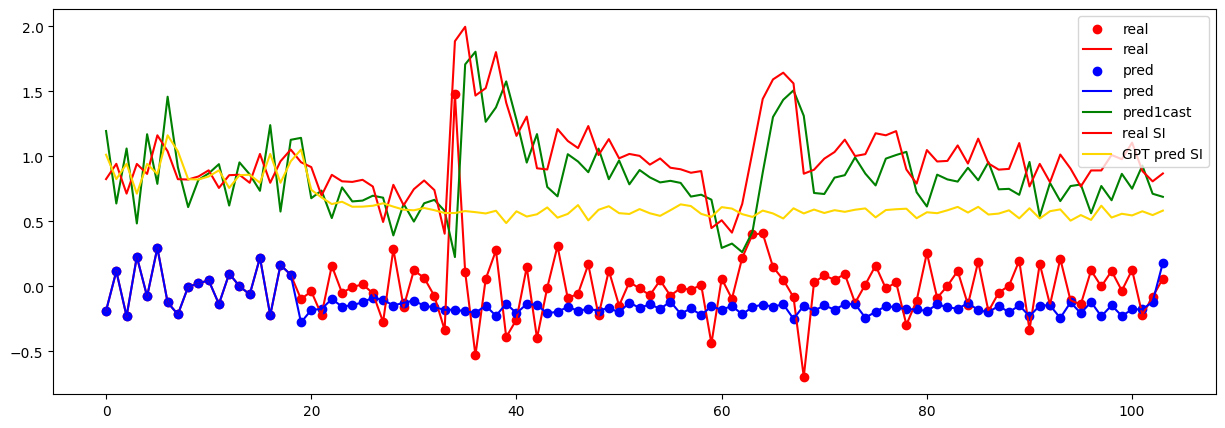

In [20]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 84 )



## 090 to 105


0 train loss =  1.1922131776809692
seq length of pred =  30
500 train loss =  0.0630345493555069
seq length of pred =  30
1000 train loss =  0.021228108555078506
seq length of pred =  30
1500 train loss =  0.010117975994944572
seq length of pred =  30
2000 train loss =  0.005651649087667465
seq length of pred =  30
2500 train loss =  0.004475564695894718
seq length of pred =  30


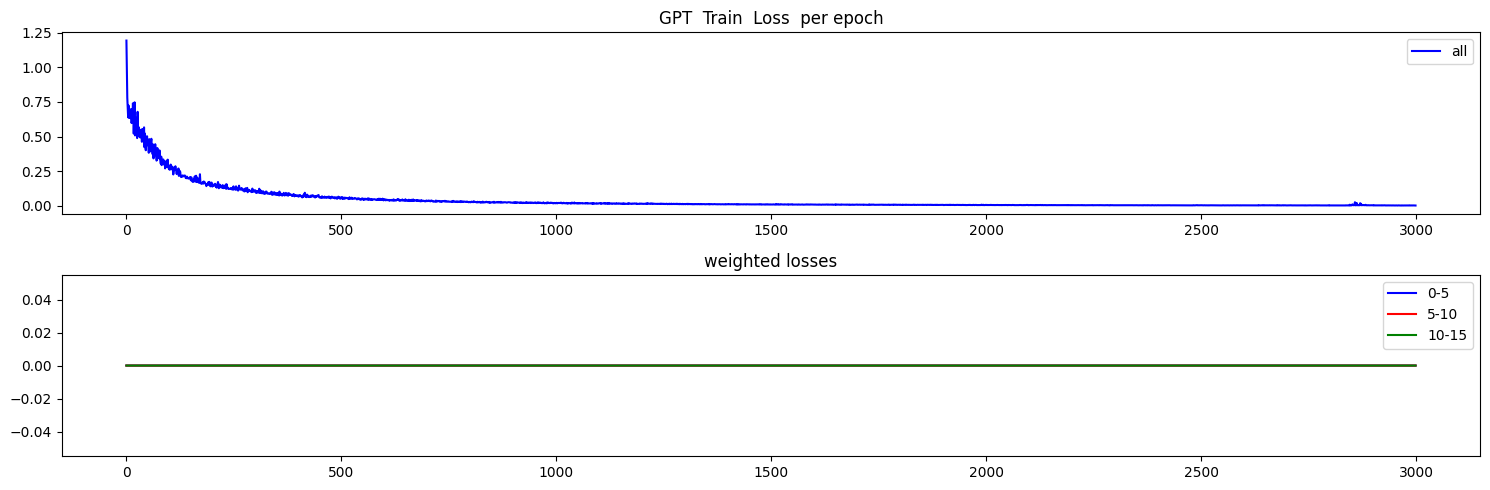

max tokens  84
torch.Size([1, 20, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.11752152442932129
Test MSE Loss - SI only 0-5:  0.0516434982419014
Test MSE Loss - SI only 5-10:  0.07359741628170013
Test MSE Loss - SI only 10-15:  0.073246531188488
mae, mse, rmse, mape, mspe, rse, corr
(0.2450478, 0.117521524, 0.34281412, 20.026327, 28696.174, 1.4428347)
Testing R**2 - SI only:  -1.0817725622683816
Testing R**2 - SI only:  -1.0817725622683816
Testing R**2 - All features:  0.9286732151494295


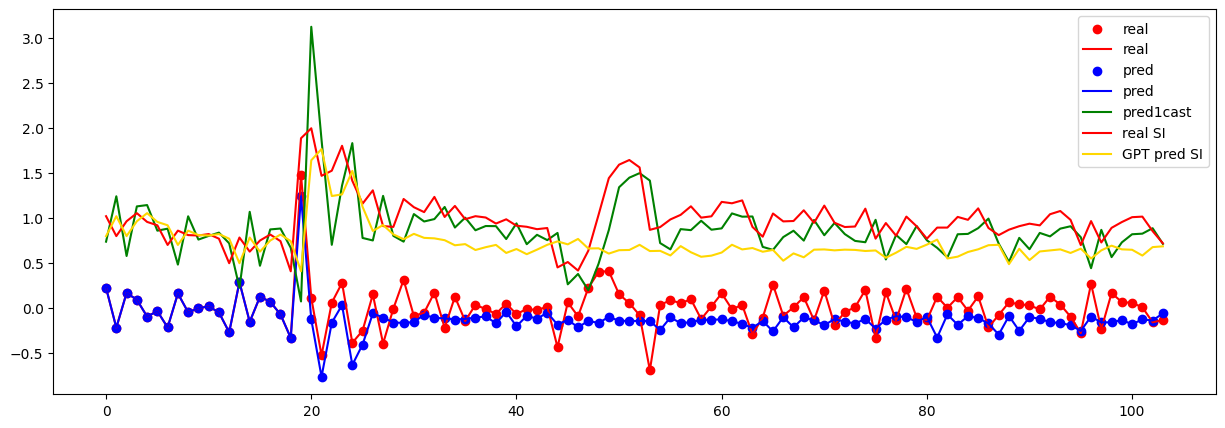

In [21]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 84 )



## Save excel to csv


In [22]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [ ]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
